# Btc Moving Average Trade Strategy

## Download data

In [55]:
import json
import time
import sys
from datetime import datetime
from urllib.request import Request, urlopen
from urllib.parse import urlencode
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.plotting import register_matplotlib_converters
import math as ma

minute = 60
hour = minute*60
day = hour*24
week = day*7
month = day*30
year = day*365

# Possible Commands
PUBLIC_COMMANDS = [ 'returnTradeHistory', 'returnChartData']

class Poloniex:
    def __init__(self):
        # Conversions
        self.timestamp_str = lambda timestamp=time.time(), format="%Y-%m-%d %H:%M:%S": datetime.fromtimestamp(timestamp).strftime(format)
        self.str_timestamp = lambda datestr=self.timestamp_str(), format="%Y-%m-%d %H:%M:%S": int(time.mktime(time.strptime(datestr, format)))
        self.float_roundPercent = lambda floatN, decimalP=2: str(round(float(floatN) * 100, decimalP))+"%"

        # PUBLIC COMMANDS
        
        self.marketChart = lambda pair, period, start=time.time()-(month*1), end=time.time(): self.api('returnChartData', {'currencyPair':pair, 'period':period, 'start':start, 'end':end})
        self.marketTradeHist = lambda pair, start=time.time()-(day*2), end=time.time(): self.api('returnTradeHistory',{'currencyPair':pair, 'start':start, 'end':end}) # NEEDS TO BE FIXED ON Poloniex

    #####################
    # Main Api Function #
    #####################
    def api(self, command, args={}):
        """
        returns 'False' if invalid command or if no APIKey or Secret is specified (if command is "private")
        returns {"error":"<error message>"} if API error
        """
        if command in PUBLIC_COMMANDS:
            url = 'https://poloniex.com/public?'
            args['command'] = command
            ret = urlopen(Request(url + urlencode(args)))
            return json.loads(ret.read().decode(encoding='UTF-8'))
        else:
            return False


In [16]:
Pol = Poloniex()
pair = 'USDT_BTC'
period = 300
MarketChart = pd.DataFrame(Pol.marketChart(pair, period))
for i in MarketChart.index:
    
    MarketChart.loc[i, 'date_str'] = Pol.timestamp_str(MarketChart.loc[i, 'date'])
MarketChart[ 'date_str'] =  pd.DatetimeIndex(MarketChart['date_str'])
MarketChart.set_index(keys = 'date_str', inplace = True)

In [18]:
MarketChart.head()

,close,date,high,low,open,quoteVolume,volume,weightedAverage
date_str,,,,,,,,
2019-04-01 09:15:57,4130.318509,1554081357,4130.318509,4130.318509,4130.318509,0.000000,0.000000,4130.318509
2019-04-01 09:20:00,4122.456512,1554081600,4130.318509,4122.456512,4130.318509,0.421827,1740.165971,4125.304878
2019-04-01 09:25:00,4122.910000,1554081900,4122.910000,4122.910000,4122.910000,0.043845,180.769896,4122.910000
2019-04-01 09:30:00,4123.500000,1554082200,4125.073123,4123.500000,4125.012460,0.927276,3823.631369,4123.511473
2019-04-01 09:35:00,4124.514492,1554082500,4124.514492,4121.595999,4122.156512,2.682758,11057.577211,4121.720672


In [19]:
MarketTradeHist = pd.DataFrame(Pol.marketTradeHist(pair))
MarketTradeHist[ 'date'] =  pd.DatetimeIndex(MarketTradeHist['date'])
MarketTradeHist.set_index(keys = 'date', inplace = True)
MarketTradeHist = MarketTradeHist.sort(index, ascending  = True)

In [30]:
MarketTradeHist = MarketTradeHist.sort_index()
MarketTradeHist.head()

,amount,globalTradeID,orderNumber,rate,total,tradeID,type
date,,,,,,,
2019-04-29 01:16:01,0.00160543,414982044,259917396547,5328.95878341,8.55527029,26740000,sell
2019-04-29 01:16:04,0.00187576,414982046,259917406537,5328.00000000,9.99404928,26740001,buy
2019-04-29 01:16:57,0.02815315,414982057,259917477466,5327.99999997,149.99998319,26740002,buy
2019-04-29 01:17:05,0.00187653,414982059,259917488455,5327.99999997,9.99815183,26740003,buy
2019-04-29 01:17:41,0.00107606,414982087,259917528415,5325.16837498,5.73020068,26740005,sell


## Moving Average Trade Strategy

In [59]:
## calculate EMA
ema = []
for j in range(1, 20):
    ema.append(MarketChart['close'].ewm(span = 10 * j).mean())


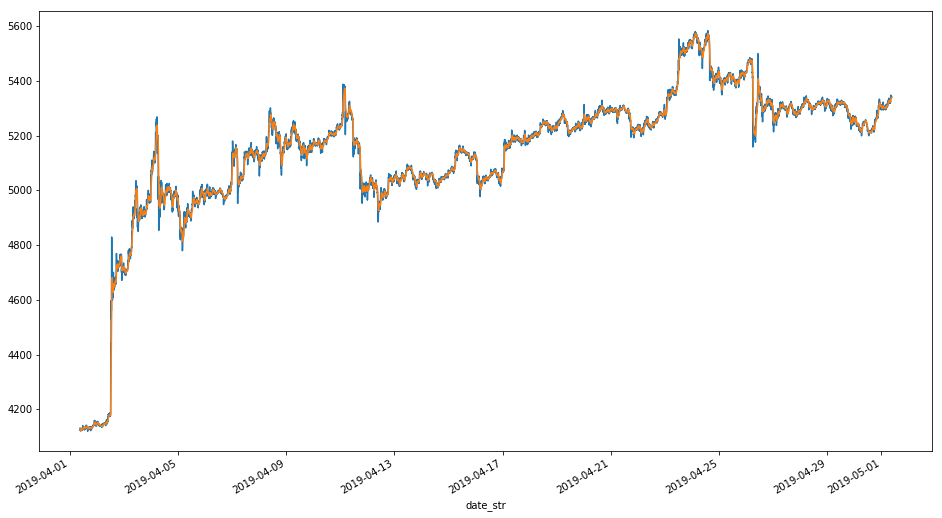

In [41]:
MarketChart['close'].plot(figsize=(16,9))
plt.plot(MarketChart.index, ema[0])
plt.show()

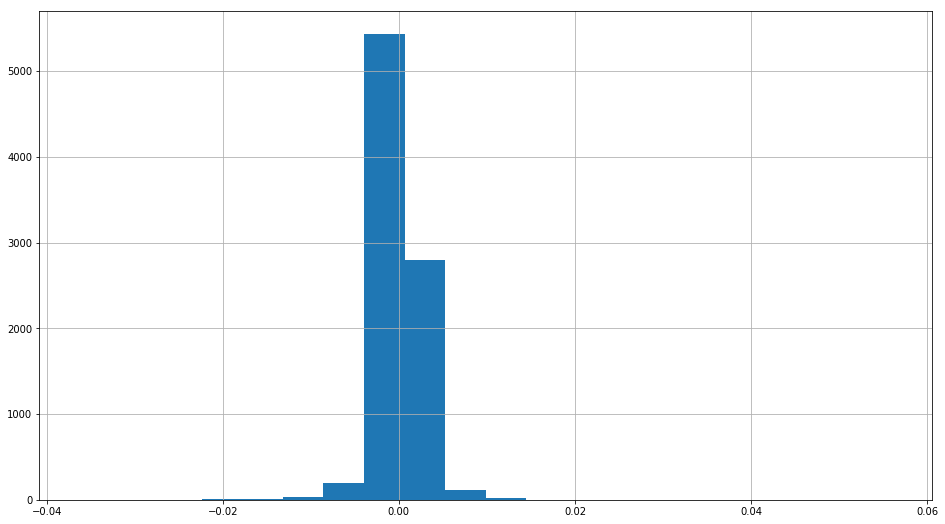

j=0 diff_pct_close_vs_ema_negative_unnormal: -0.008 diff_pct_close_vs_ema_min: -0.036 diff_pct_close_vs_ema_max:0.056 diff_pct_close_vs_ema_positive_unnormal: 0.009


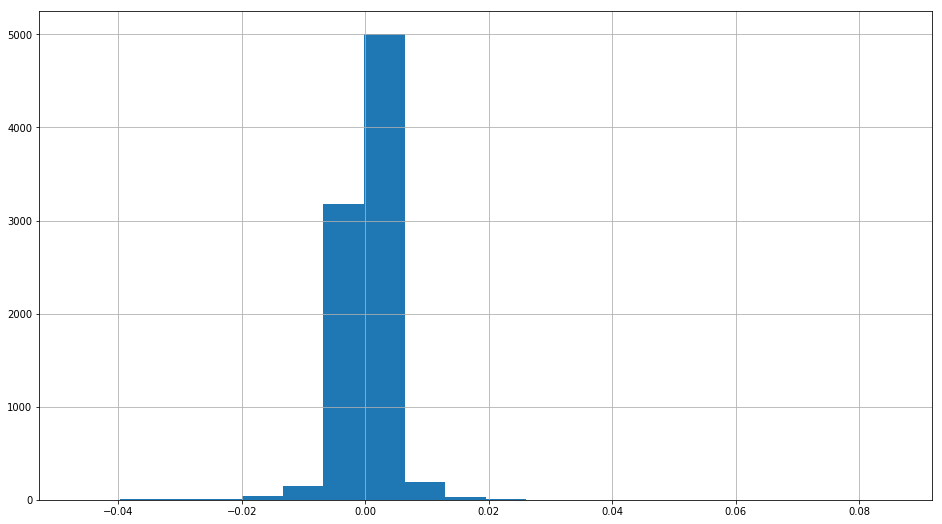

j=1 diff_pct_close_vs_ema_negative_unnormal: -0.012 diff_pct_close_vs_ema_min: -0.046 diff_pct_close_vs_ema_max:0.085 diff_pct_close_vs_ema_positive_unnormal: 0.013


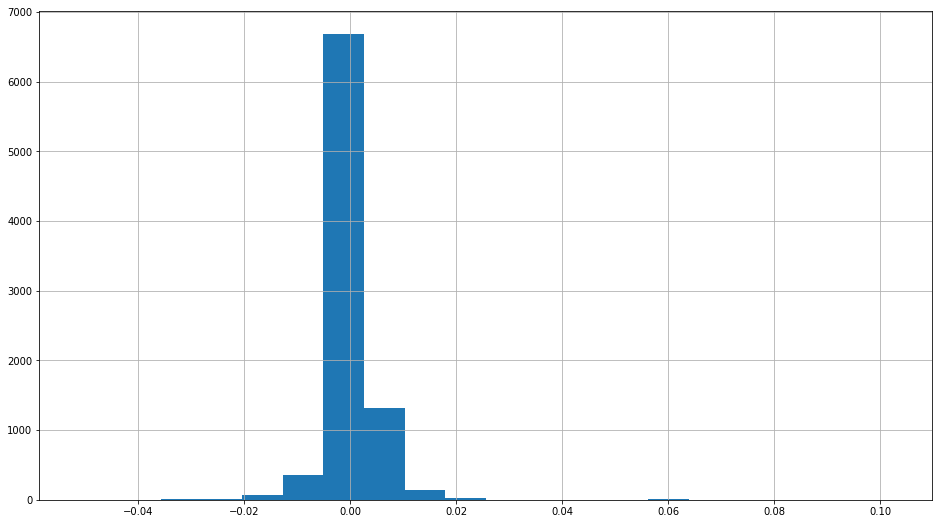

j=2 diff_pct_close_vs_ema_negative_unnormal: -0.015 diff_pct_close_vs_ema_min: -0.051 diff_pct_close_vs_ema_max:0.102 diff_pct_close_vs_ema_positive_unnormal: 0.016


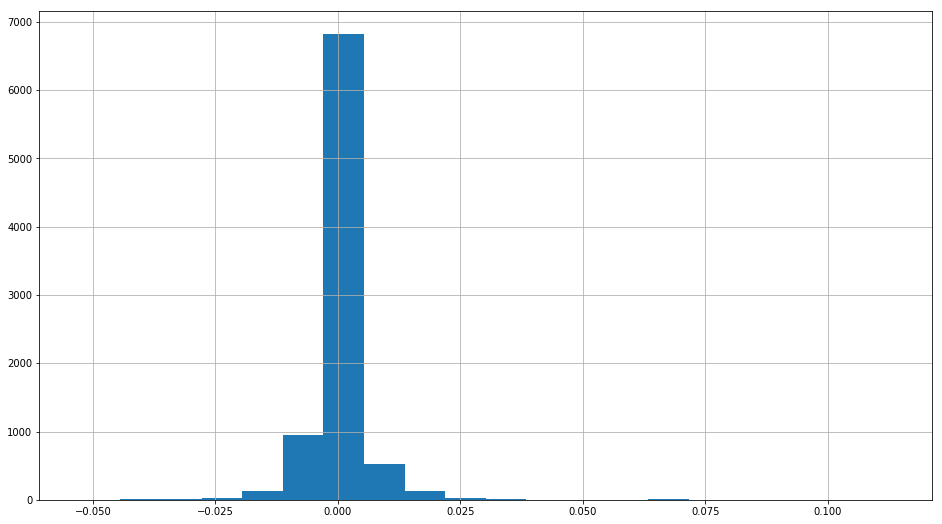

j=3 diff_pct_close_vs_ema_negative_unnormal: -0.017 diff_pct_close_vs_ema_min: -0.053 diff_pct_close_vs_ema_max:0.113 diff_pct_close_vs_ema_positive_unnormal: 0.019


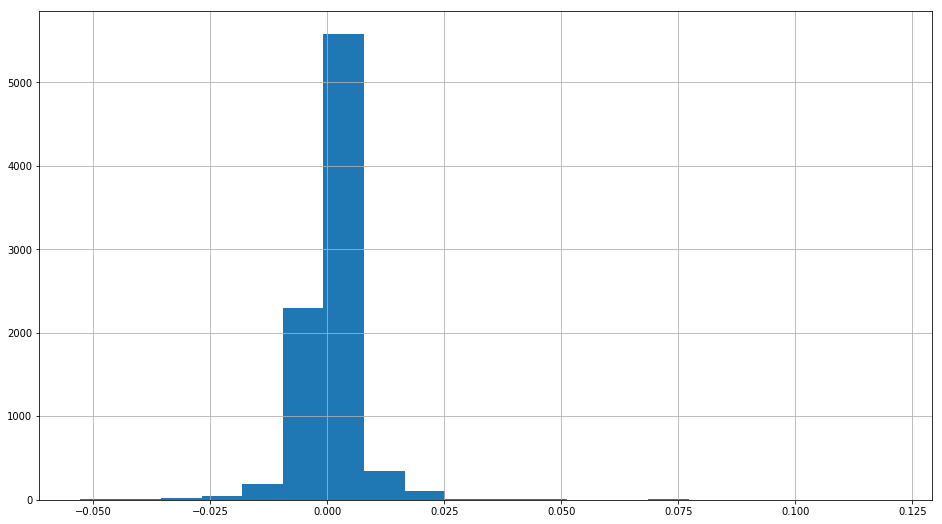

j=4 diff_pct_close_vs_ema_negative_unnormal: -0.019 diff_pct_close_vs_ema_min: -0.053 diff_pct_close_vs_ema_max:0.121 diff_pct_close_vs_ema_positive_unnormal: 0.021


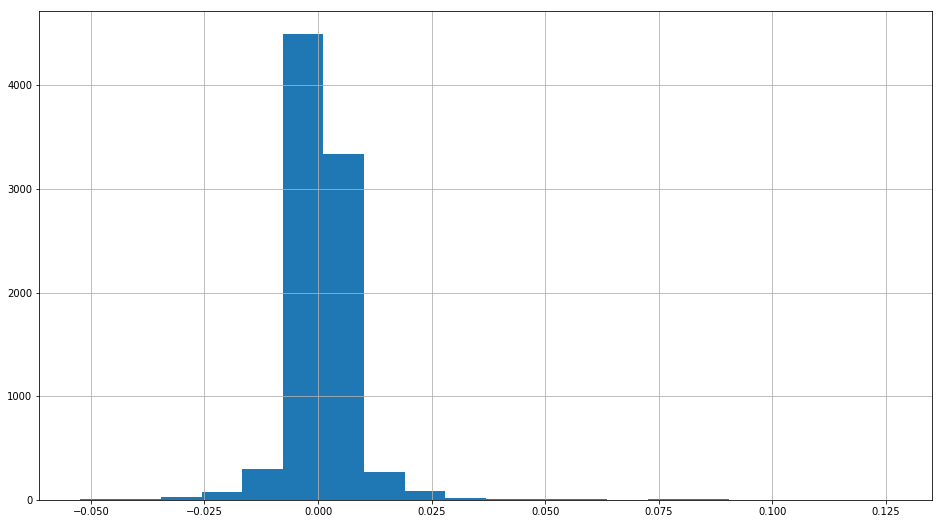

j=5 diff_pct_close_vs_ema_negative_unnormal: -0.021 diff_pct_close_vs_ema_min: -0.052 diff_pct_close_vs_ema_max:0.126 diff_pct_close_vs_ema_positive_unnormal: 0.023


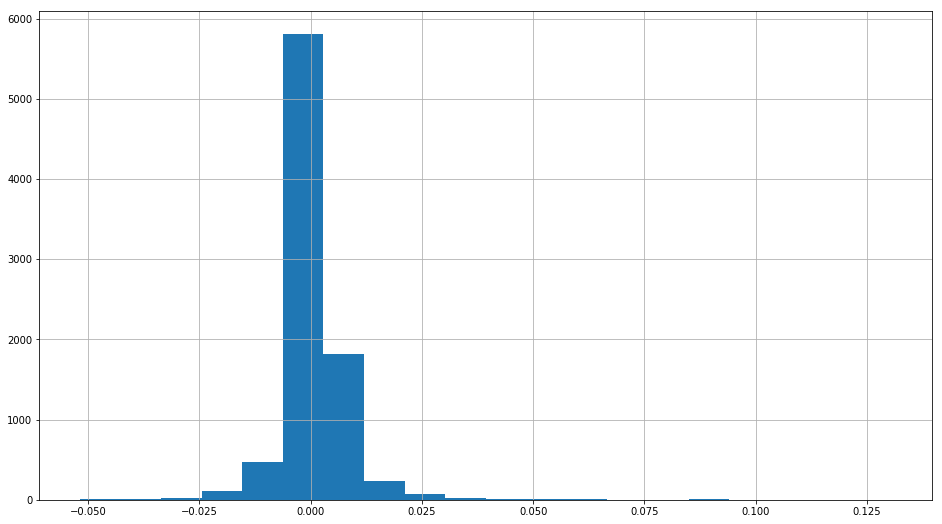

j=6 diff_pct_close_vs_ema_negative_unnormal: -0.023 diff_pct_close_vs_ema_min: -0.052 diff_pct_close_vs_ema_max:0.131 diff_pct_close_vs_ema_positive_unnormal: 0.025


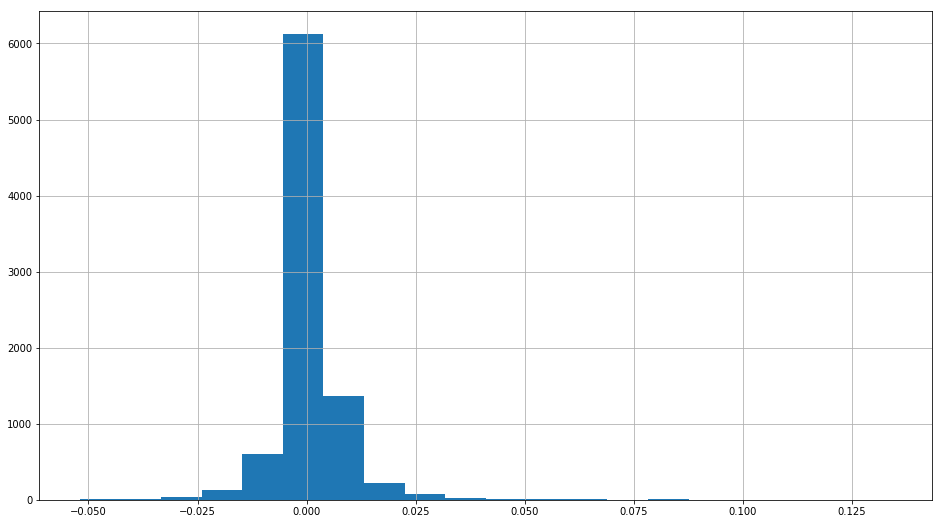

j=7 diff_pct_close_vs_ema_negative_unnormal: -0.024 diff_pct_close_vs_ema_min: -0.052 diff_pct_close_vs_ema_max:0.134 diff_pct_close_vs_ema_positive_unnormal: 0.026


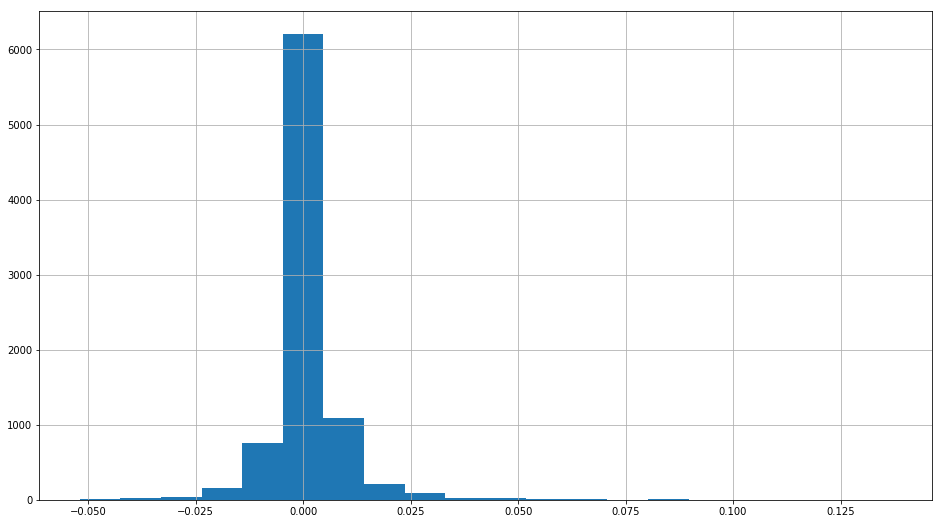

j=8 diff_pct_close_vs_ema_negative_unnormal: -0.025 diff_pct_close_vs_ema_min: -0.052 diff_pct_close_vs_ema_max:0.137 diff_pct_close_vs_ema_positive_unnormal: 0.028


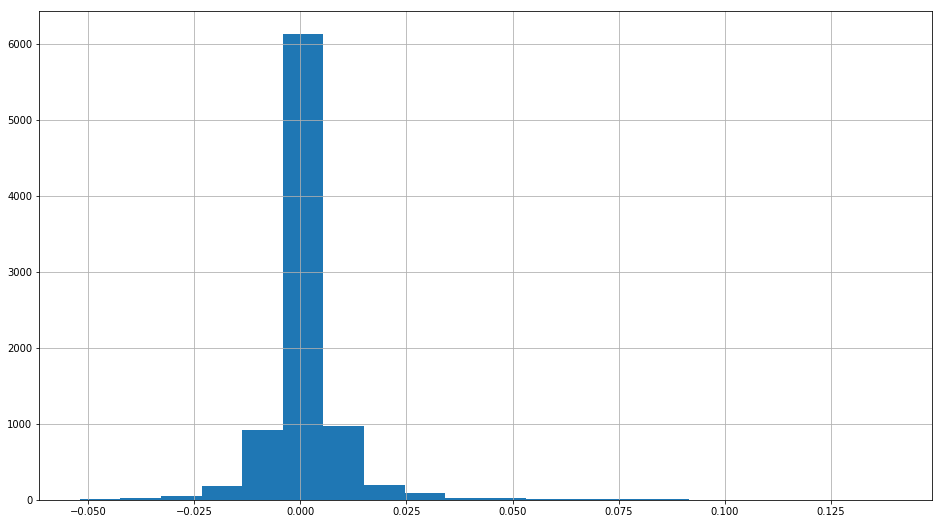

j=9 diff_pct_close_vs_ema_negative_unnormal: -0.027 diff_pct_close_vs_ema_min: -0.052 diff_pct_close_vs_ema_max:0.139 diff_pct_close_vs_ema_positive_unnormal: 0.029


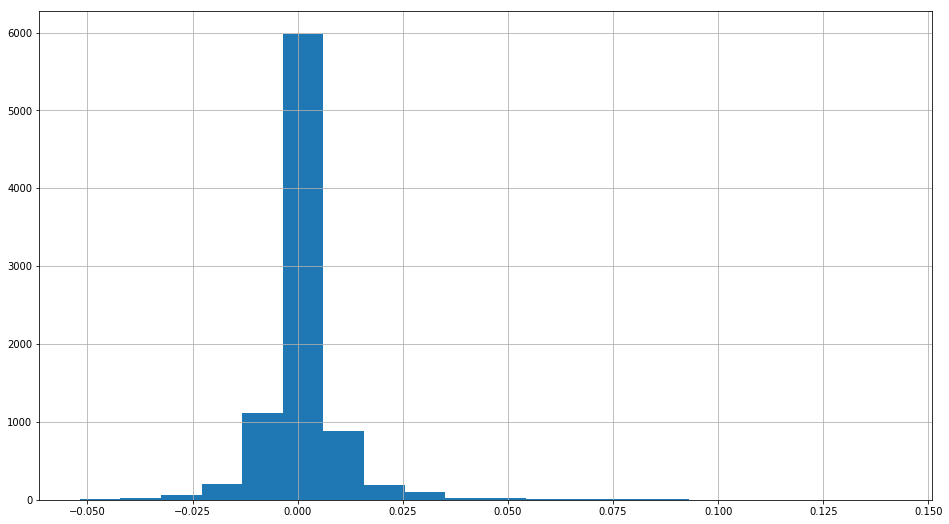

j=10 diff_pct_close_vs_ema_negative_unnormal: -0.028 diff_pct_close_vs_ema_min: -0.052 diff_pct_close_vs_ema_max:0.141 diff_pct_close_vs_ema_positive_unnormal: 0.031


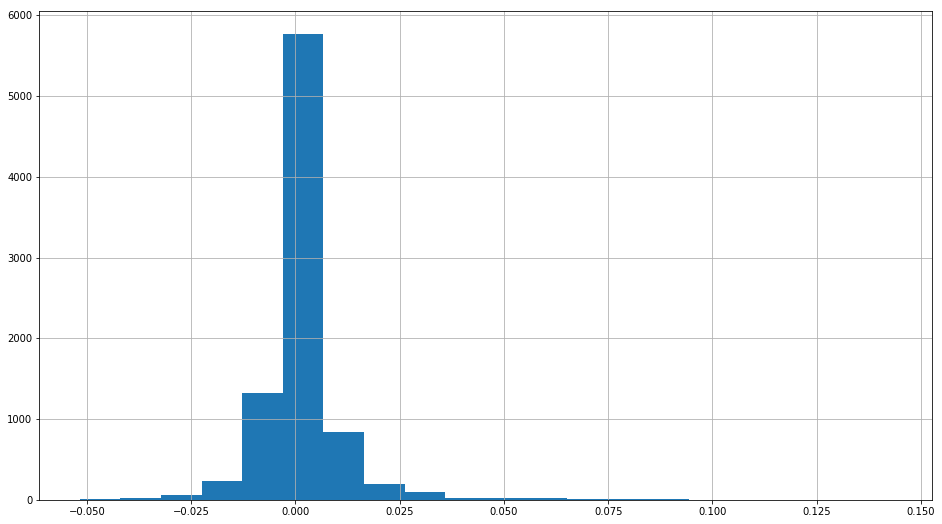

j=11 diff_pct_close_vs_ema_negative_unnormal: -0.029 diff_pct_close_vs_ema_min: -0.052 diff_pct_close_vs_ema_max:0.143 diff_pct_close_vs_ema_positive_unnormal: 0.032


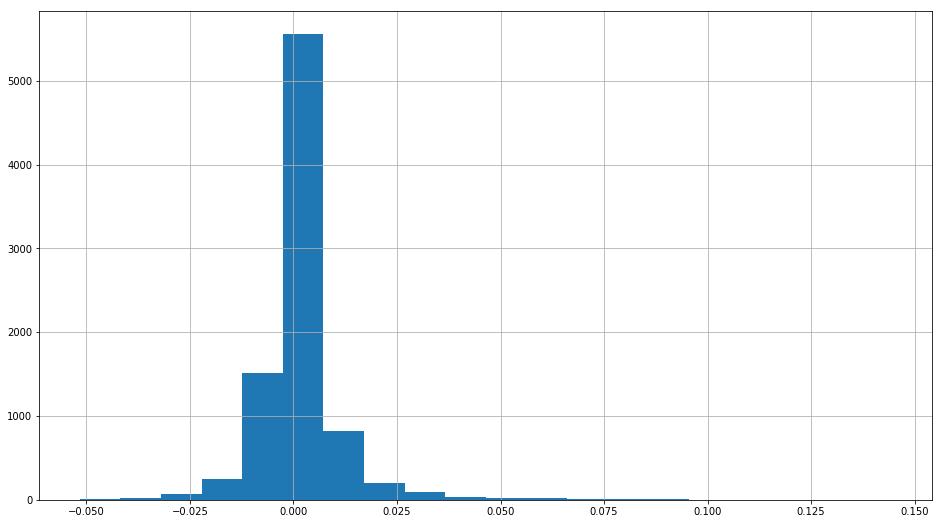

j=12 diff_pct_close_vs_ema_negative_unnormal: -0.030 diff_pct_close_vs_ema_min: -0.052 diff_pct_close_vs_ema_max:0.144 diff_pct_close_vs_ema_positive_unnormal: 0.034


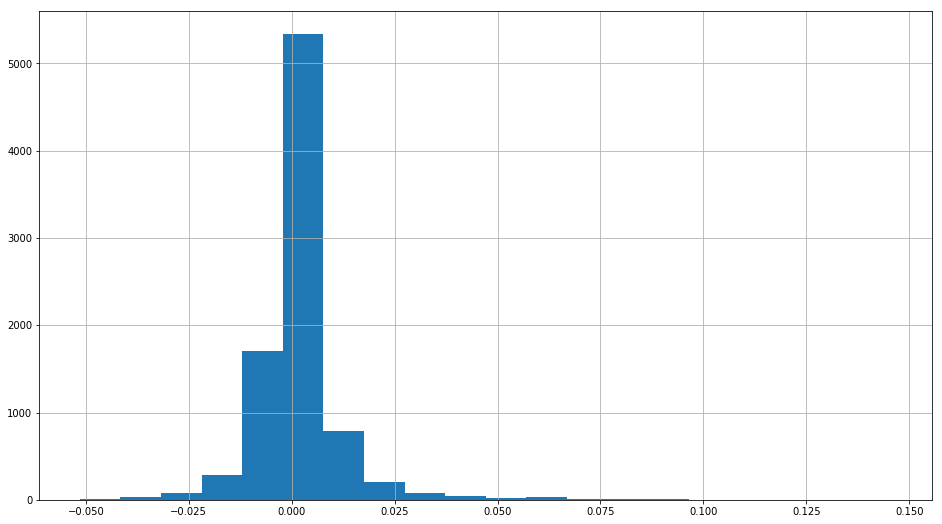

j=13 diff_pct_close_vs_ema_negative_unnormal: -0.031 diff_pct_close_vs_ema_min: -0.051 diff_pct_close_vs_ema_max:0.146 diff_pct_close_vs_ema_positive_unnormal: 0.035


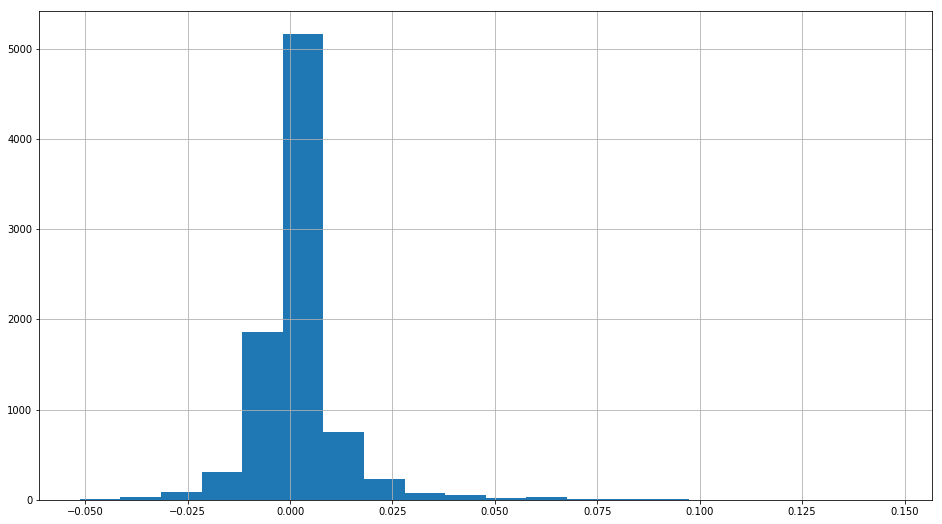

j=14 diff_pct_close_vs_ema_negative_unnormal: -0.032 diff_pct_close_vs_ema_min: -0.051 diff_pct_close_vs_ema_max:0.147 diff_pct_close_vs_ema_positive_unnormal: 0.036


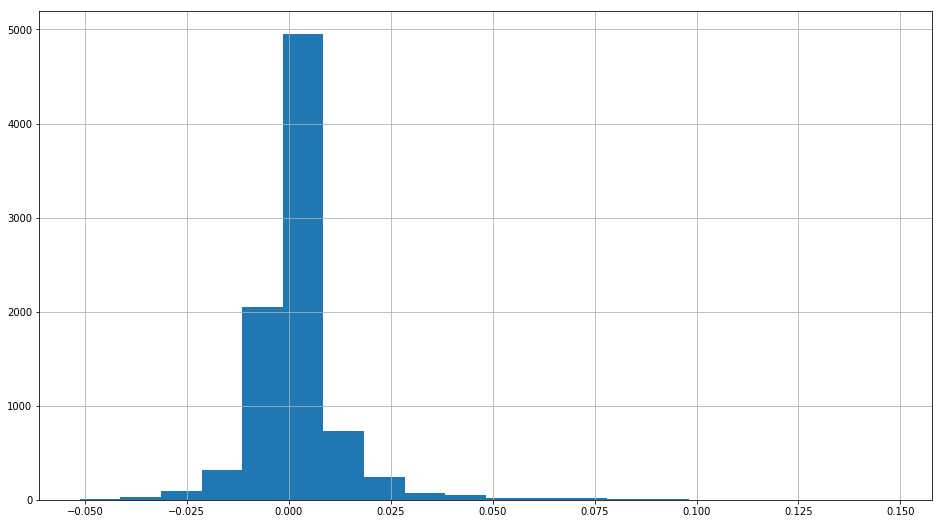

j=15 diff_pct_close_vs_ema_negative_unnormal: -0.033 diff_pct_close_vs_ema_min: -0.051 diff_pct_close_vs_ema_max:0.148 diff_pct_close_vs_ema_positive_unnormal: 0.038


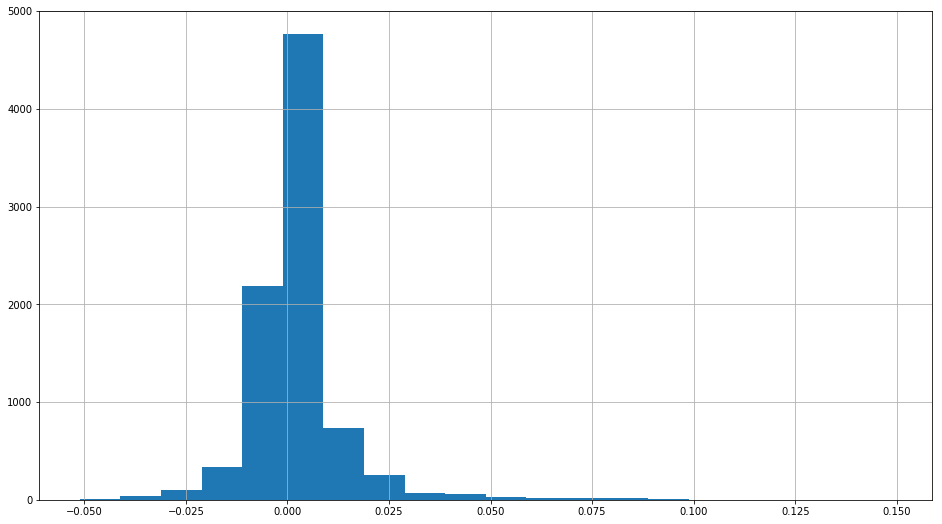

j=16 diff_pct_close_vs_ema_negative_unnormal: -0.034 diff_pct_close_vs_ema_min: -0.051 diff_pct_close_vs_ema_max:0.149 diff_pct_close_vs_ema_positive_unnormal: 0.039


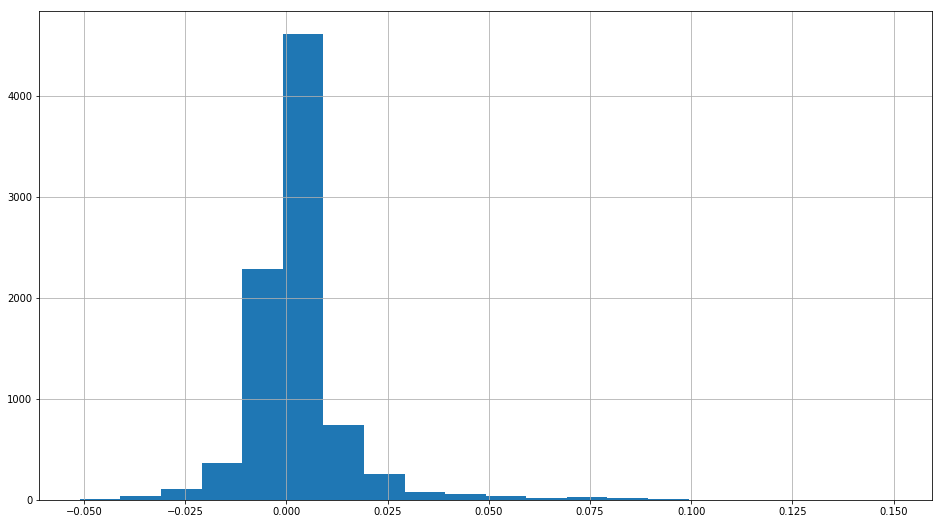

j=17 diff_pct_close_vs_ema_negative_unnormal: -0.035 diff_pct_close_vs_ema_min: -0.051 diff_pct_close_vs_ema_max:0.150 diff_pct_close_vs_ema_positive_unnormal: 0.040


In [60]:

# cal the difference between close and ema
diff_pct_close_vs_ema = []
diff_pct_close_vs_ema_mean = []
diff_pct_close_vs_ema_std = []
diff_pct_close_vs_ema_negative_unnormal = []
diff_pct_close_vs_ema_positive_unnormal = []
diff_pct_close_vs_ema_max = []
diff_pct_close_vs_ema_min = []
for j in range(18):
    diff_pct_close_vs_ema.append((MarketChart['close'] - ema[j])/ ema[j])
    diff_pct_close_vs_ema_mean.append(diff_pct_close_vs_ema[j].mean())
    diff_pct_close_vs_ema_std.append(diff_pct_close_vs_ema[j].std())
    diff_pct_close_vs_ema_negative_unnormal.append(diff_pct_close_vs_ema_mean[j] - 3 * diff_pct_close_vs_ema_std[j])
    diff_pct_close_vs_ema_positive_unnormal.append(diff_pct_close_vs_ema_mean[j] + 3 * diff_pct_close_vs_ema_std[j])
    diff_pct_close_vs_ema_max.append(diff_pct_close_vs_ema[j].max())
    diff_pct_close_vs_ema_min.append(diff_pct_close_vs_ema[j].min())
    diff_pct_close_vs_ema[j].hist(bins=20,figsize=(16,9))
    plt.show()
    print('j={0} diff_pct_close_vs_ema_negative_unnormal: {1:.3f} diff_pct_close_vs_ema_min: {2:.3f} diff_pct_close_vs_ema_max:{3:.3f} diff_pct_close_vs_ema_positive_unnormal: {4:.3f}'.format(j, diff_pct_close_vs_ema_negative_unnormal[j], diff_pct_close_vs_ema_min[j], diff_pct_close_vs_ema_max[j], diff_pct_close_vs_ema_positive_unnormal[j]))

In [83]:
## select j 
performance = {'j':[], 'final_pnl':[], 'win_rate':[]}
sig_buy_list = []
sig_sell_list = []
signal_list = []
for j in range(18):
    ## setup signal
    sig_buy = ma.ceil(diff_pct_close_vs_ema_negative_unnormal[j] * 1000) / 1000
    sig_buy_list.append(sig_buy)
    sig_sell = ma.floor(diff_pct_close_vs_ema_positive_unnormal[j] * 1000) / 1000
    sig_sell_list.append(sig_sell)
    index_stock_price = 1
    n_stock_price = len(MarketChart)
    sig = np.zeros(n_stock_price, dtype = np.int)
    for index_stock_price in range(n_stock_price):
        if diff_pct_close_vs_ema[j][index_stock_price - 1] <  sig_buy:
            sig[index_stock_price] = 1
        elif diff_pct_close_vs_ema[j][index_stock_price - 1] >= sig_sell:
            sig[index_stock_price] = - 1
        else:
            if sig[index_stock_price - 1] == 1:
                sig[index_stock_price] = 1
            elif sig[index_stock_price - 1] == 0:
                sig[index_stock_price] = 0
            elif sig[index_stock_price - 1] == - 1:
                sig[index_stock_price] = - 1
    signal = pd.Series(sig, index = MarketChart.index)
    signal_list.append(signal)
    # now let's accumulate some P&L
    position = 0
    trade_size = 1 # 1 share
    pnl = 0
    previous_signal = 0
    start_price = 0
    negative_pnl = 0
    positive_pnl = 0
    for index, row in MarketChart.iterrows():
        current_signal = signal.loc[index]
        if current_signal != previous_signal: # we need to do a trade
            # first check if we have an open position
            if position != 0: 
                # first we need to close the position and calculate P&L
                current_pnl = position * (row['open'] - start_price)
                if current_pnl < 0:
                    negative_pnl += 1
                else:
                    positive_pnl += 1
                pnl += current_pnl
                
            # now open a new position
            position = trade_size * current_signal # buy if signal is positive, sell if signal is negative
            start_price = row['open']
            previous_signal = current_signal
    win_rate = positive_pnl / (positive_pnl + negative_pnl) * 100
    performance['j'].append(j) 
    performance['final_pnl'].append(pnl)
    performance['win_rate'].append(win_rate)
    

In [73]:
## select j=8 when final_pnl is the max
performance_df = pd.DataFrame(performance)
performance_df[performance_df['final_pnl'] == performance_df['final_pnl'].max()]

,j,final_pnl,win_rate
8,8,1580.754711,87.5
9,9,1580.754711,87.5


In [81]:
## calculate annual return
MarketChart
stats.gmean(pc_array)-1)*((365*24*2)**0.5)

-0.025

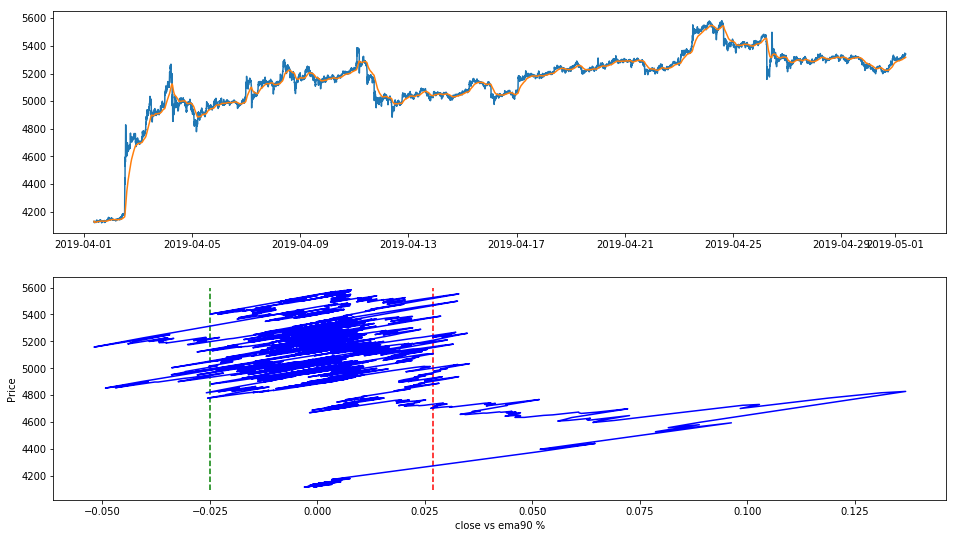

In [82]:
## 
register_matplotlib_converters()
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(16,9), sharex=False)
ax1.plot(MarketChart.index, MarketChart['close'])
ax1.plot(MarketChart.index, ema[8])
ax2.plot(diff_pct_close_vs_ema[8], MarketChart['close'], "b-")
ax2.set_xlabel('close vs ema{0:d} %'.format(90))
ax2.set_ylabel('Price')
ax2.vlines(sig_buy_list[8], 4100, 5600, colors = "green", linestyles = "dashed")
ax2.vlines(sig_sell_list[8], 4100, 5600, colors = "red", linestyles = "dashed")